## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # visualize missing data
%matplotlib inline

## Load data

In [2]:
# load the dataset
data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

## Data Wrangling

In [3]:
# Check if data exist
if data.empty:
    print('No data')
else:
    print("Data exist")

Data exist


In [4]:
# show the head of the dataframe
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
data.shape

(110527, 14)

In [6]:
for i, v in enumerate(data.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [7]:
df = data.drop(["PatientId", "AppointmentID"], axis=1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
df.shape

(110527, 12)

In [10]:
for k, c in enumerate(df.columns):
    print(k, c)

0 Gender
1 ScheduledDay
2 AppointmentDay
3 Age
4 Neighbourhood
5 Scholarship
6 Hipertension
7 Diabetes
8 Alcoholism
9 Handcap
10 SMS_received
11 No-show


In [11]:
df.dtypes.to_frame('Types')

,Types
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64
Alcoholism,int64
Handcap,int64


In [12]:
# show the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


## Data Cleaning

In [13]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [14]:
print("Dimension:", df.ndim)

Dimension: 2


In [15]:
df.count().to_frame('Total')

,Total
Gender,110527
ScheduledDay,110527
AppointmentDay,110527
Age,110527
Neighbourhood,110527
Scholarship,110527
Hipertension,110527
Diabetes,110527
Alcoholism,110527
Handcap,110527


In [16]:
print("No-show: ", set(df["No-show"]))
print("Gender: ", set(df["Gender"]))

No-show:  {'No', 'Yes'}
Gender:  {'F', 'M'}


In [17]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [18]:
df["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [19]:
df.nunique().to_frame("unique data")

,unique data
Gender,2
ScheduledDay,103549
AppointmentDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hipertension,2
Diabetes,2
Alcoholism,2
Handcap,5


In [20]:
# Data duplicated
for i in df.columns:
    print("{}: {}".format(i, df[i].duplicated().sum()))

Gender: 110525
ScheduledDay: 6978
AppointmentDay: 110500
Age: 110423
Neighbourhood: 110446
Scholarship: 110525
Hipertension: 110525
Diabetes: 110525
Alcoholism: 110525
Handcap: 110522
SMS_received: 110525
No-show: 110525


In [21]:
df.drop_duplicates(inplace=True)
df.shape

(109892, 12)

In [22]:
df.isnull().sum().to_frame("Null values")

,Null values
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0
Alcoholism,0
Handcap,0


## Exploratory Data Analysis (EDA)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,109892.0,37.089506,23.121196,-1.0,18.0,37.0,55.0,115.0
Scholarship,109892.0,0.098287,0.297704,0.0,0.0,0.0,0.0,1.0
Hipertension,109892.0,0.197248,0.397923,0.0,0.0,0.0,0.0,1.0
Diabetes,109892.0,0.071825,0.258199,0.0,0.0,0.0,0.0,1.0
Alcoholism,109892.0,0.030430,0.171768,0.0,0.0,0.0,0.0,1.0
Handcap,109892.0,0.022131,0.160878,0.0,0.0,0.0,0.0,4.0
SMS_received,109892.0,0.322881,0.467580,0.0,0.0,0.0,1.0,1.0


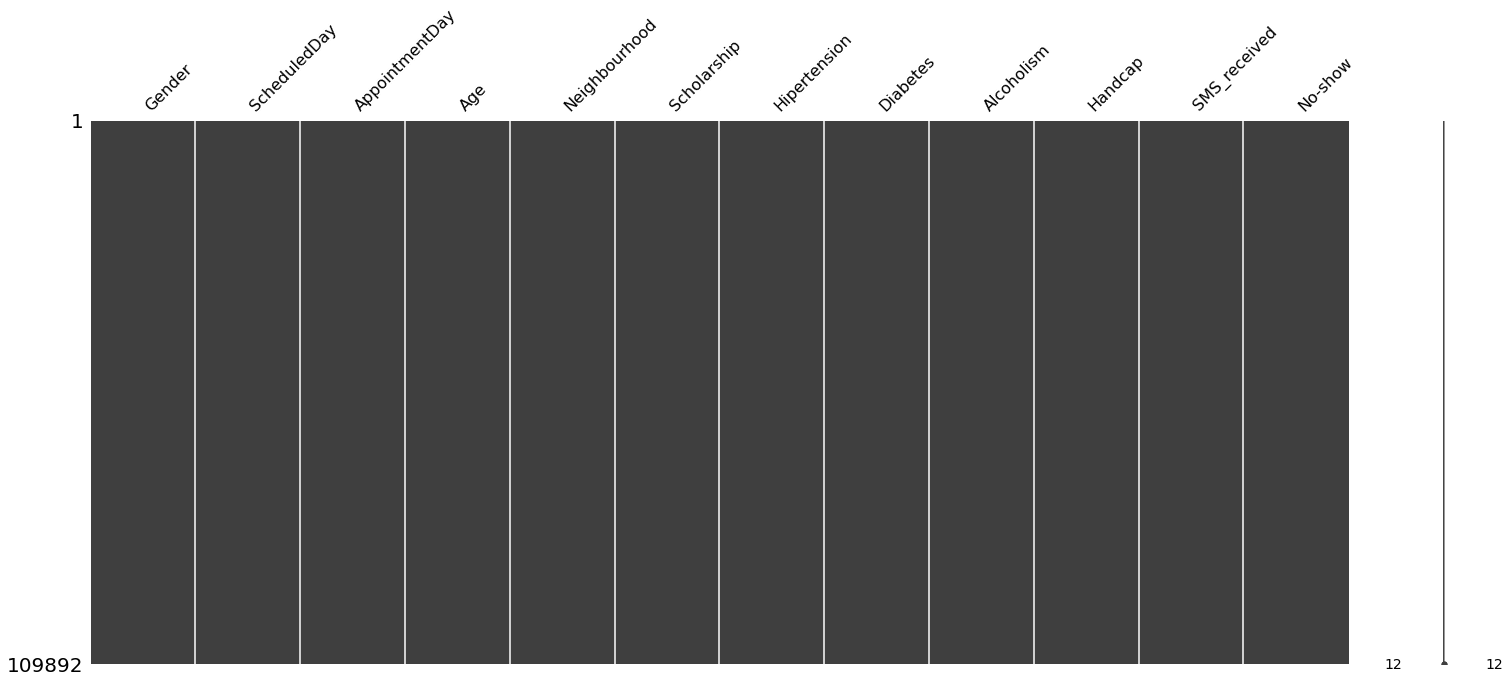

In [24]:
# plot missing values
ms.matrix(df);

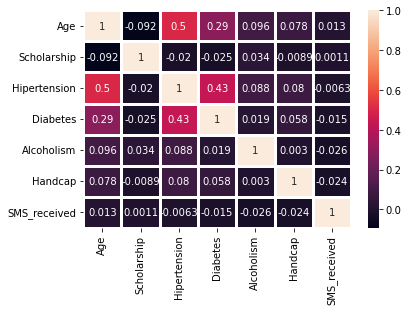

In [25]:
sns.heatmap(df.corr(), annot=True, linewidths=3);

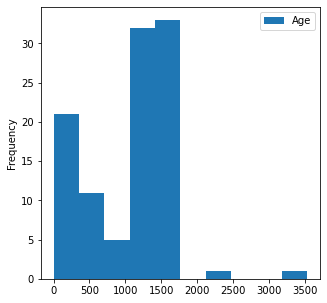

In [26]:
df["Age"].value_counts().plot.hist(figsize=(5, 5)).legend();

In [27]:
print('Scholarship: ', set(df['Scholarship']))
print('Diabetes: ', set(df['Diabetes']))

Scholarship:  {0, 1}
Diabetes:  {0, 1}


In [28]:
df[["Scholarship", "Diabetes"]].query("Scholarship == 1 and Diabetes == 1").value_counts()

Scholarship  Diabetes
1            1           566
dtype: int64

In [29]:
df[["Scholarship", "Diabetes"]] .query("Scholarship == 1 and Diabetes == 0").value_counts()

Scholarship  Diabetes
1            0           10235
dtype: int64

In [30]:
df[["Scholarship", "Diabetes"]] .query("Scholarship == 0 and Diabetes == 0").value_counts()

Scholarship  Diabetes
0            0           91764
dtype: int64

In [31]:
df[["Scholarship", "Diabetes"]] .query("Scholarship == 0 and Diabetes == 1").value_counts()

Scholarship  Diabetes
0            1           7327
dtype: int64

0    99666
1    10861
Name: Scholarship, dtype: int64


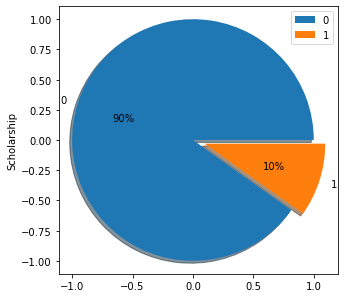

In [11]:
print(df["Scholarship"].value_counts())
df["Scholarship"].value_counts().plot.pie(figsize=(5, 5), autopct="%.0f%%", explode=[0, 0.1], shadow=True, frame=True).legend();

F    71840
M    38687
Name: Gender, dtype: int64


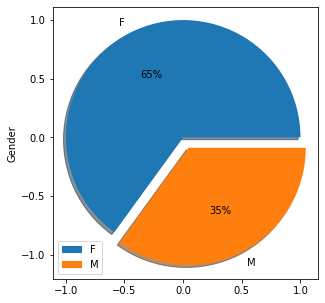

In [13]:
print(df["Gender"].value_counts());
df["Gender"].value_counts().plot.pie(figsize=(5, 5), autopct="%.0f%%", explode=[0, 0.1], shadow=True, frame=True).legend();

In [ ]:
print(df["Hipertension"].value_counts())
df["Hipertension"].value_counts().plot.pie(figsize=(5, 5), autopct="%.2f").legend();

0    101999
1      7893
Name: Diabetes, dtype: int64


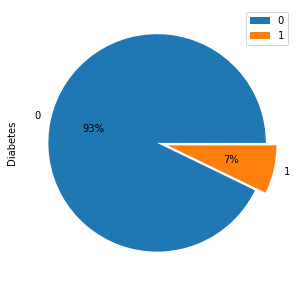

In [51]:
print(df["Diabetes"].value_counts())
df["Diabetes"].value_counts().plot.pie(figsize=(5, 5), autopct="%.0f%%", explode=[0, 0.1]).legend();

0    106548
1      3344
Name: Alcoholism, dtype: int64


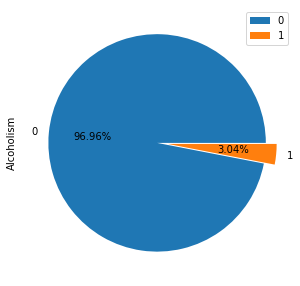

In [53]:
print(df["Alcoholism"].value_counts())
df["Alcoholism"].value_counts().plot.pie(figsize=(5, 5), autopct="%.2f%%", explode=[0, 0.1]).legend();

0    107673
1      2023
2       182
3        11
4         3
Name: Handcap, dtype: int64


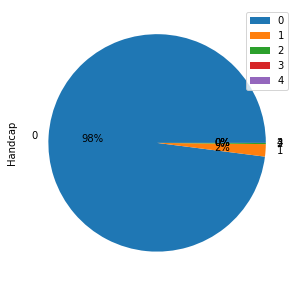

In [61]:
print(df["Handcap"].value_counts())
df["Handcap"].value_counts().plot.pie(figsize=(5, 5), autopct="%.0f%%").legend();

0    74410
1    35482
Name: SMS_received, dtype: int64


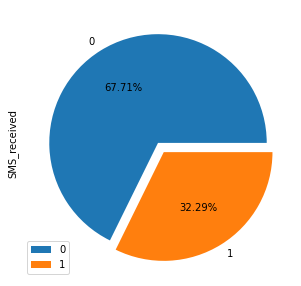

In [63]:
print(df["SMS_received"].value_counts())
df["SMS_received"].value_counts().plot.pie(figsize=(5, 5), autopct="%.2f%%", explode=[0, 0.1]).legend();

No     87794
Yes    22098
Name: No-show, dtype: int64


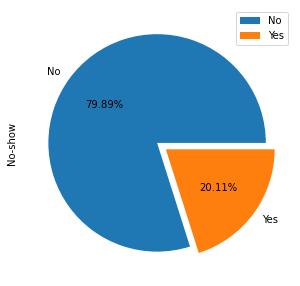

In [64]:
print(df["No-show"].value_counts())
df["No-show"].value_counts().plot.pie(figsize=(5, 5), autopct="%.2f%%", explode=[0, 0.1]).legend();

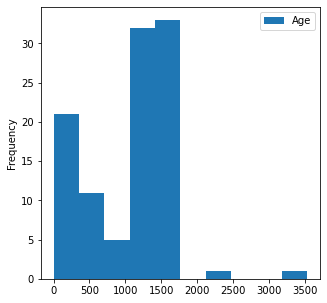

In [65]:
# df["Age"].value_counts().plot.density(figsize=(5, 5)).legend();
df["Age"].value_counts().plot.hist(figsize=(5, 5)).legend();

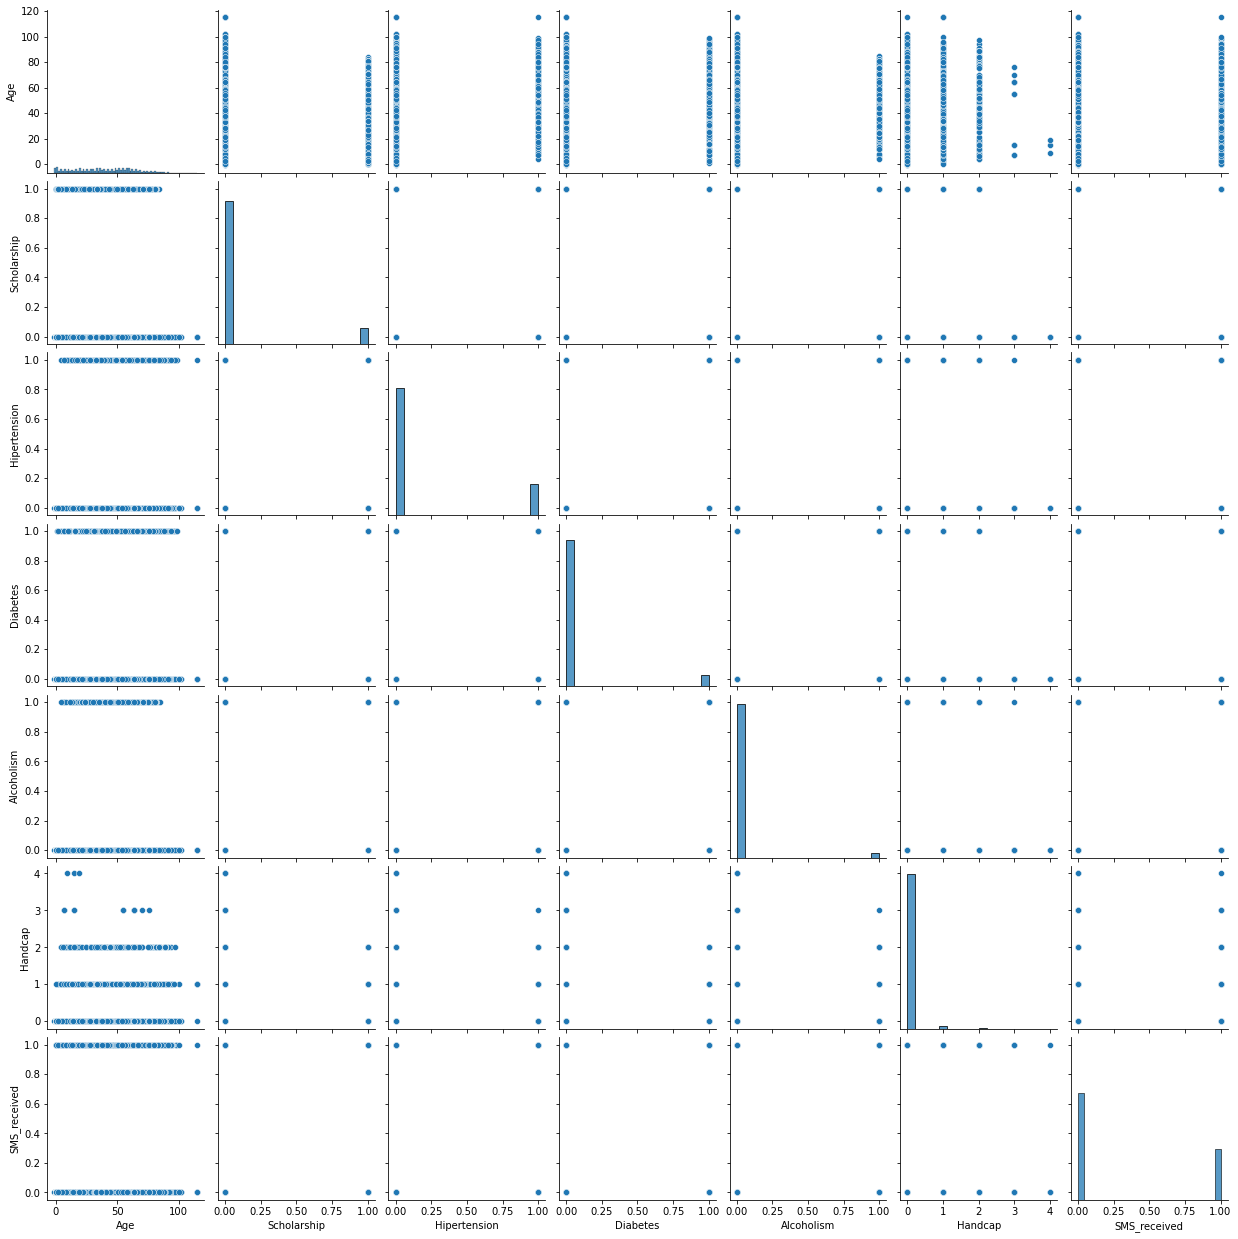

In [66]:
sns.pairplot(df);

In [67]:
df.to_csv("time_series_ScheduledDay.csv")

In [68]:
ts = pd.read_csv("time_series_ScheduledDay.csv", index_col='ScheduledDay', parse_dates=True)
ts.head()

,Unnamed: 0,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
ScheduledDay,,,,,,,,,,,,
2016-04-29 18:38:08+00:00,0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2016-04-29 16:08:27+00:00,1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2016-04-29 16:19:04+00:00,2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
2016-04-29 17:29:31+00:00,3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
2016-04-29 16:07:23+00:00,4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
ts.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
ts.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
ScheduledDay,,,,,,,,,,,
2016-04-29 18:38:08+00:00,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2016-04-29 16:08:27+00:00,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2016-04-29 16:19:04+00:00,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
2016-04-29 17:29:31+00:00,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
2016-04-29 16:07:23+00:00,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [71]:
ts.tail()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
ScheduledDay,,,,,,,,,,,
2016-05-03 09:15:35+00:00,F,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
2016-05-03 07:27:33+00:00,F,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
2016-04-27 16:03:52+00:00,F,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
2016-04-27 15:09:23+00:00,F,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
2016-04-27 13:30:56+00:00,F,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [72]:
ts.shape

(109892, 11)

In [73]:
set(ts["No-show"])

{'No', 'Yes'}

In [74]:
ts.replace(["No", "Yes"], [1, 0], inplace=True)

In [75]:
set(ts["No-show"])

{0, 1}

## Time Series

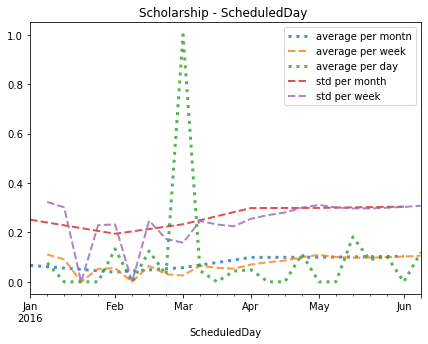

In [76]:
plt.figure(figsize=(7, 5))
ts.loc['2016', 'Scholarship'].resample('M').mean().plot(label='average per montn', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Scholarship'].resample('W').mean().plot(label='average per week', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Scholarship'].resample('D').mean().plot(label='average per day', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Scholarship'].resample('M').std().plot(label='std per month', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Scholarship'].resample('W').std().plot(label='std per week', lw=2, ls='--', alpha=0.8)
plt.title("Scholarship - ScheduledDay ")
plt.legend()
plt.show()

In [77]:
ts.loc['2016', 'Scholarship'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-31 00:00:00+00:00,0.066667,0.251549,0,1
2016-02-29 00:00:00+00:00,0.039286,0.194622,0,1
2016-03-31 00:00:00+00:00,0.057558,0.232938,0,1
2016-04-30 00:00:00+00:00,0.099005,0.298674,0,1
2016-05-31 00:00:00+00:00,0.099442,0.299257,0,1
2016-06-30 00:00:00+00:00,0.103375,0.304460,0,1


In [78]:
ts.loc['2016', 'Scholarship'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-10 00:00:00+00:00,0.111111,0.323381,0,1
2016-01-17 00:00:00+00:00,0.090909,0.301511,0,1
2016-01-24 00:00:00+00:00,0.000000,0.000000,0,0
2016-01-31 00:00:00+00:00,0.052632,0.229416,0,1
2016-02-07 00:00:00+00:00,0.055556,0.232311,0,1
2016-02-14 00:00:00+00:00,0.000000,0.000000,0,0
2016-02-21 00:00:00+00:00,0.064516,0.247676,0,1
2016-02-28 00:00:00+00:00,0.031008,0.174014,0,1
2016-03-06 00:00:00+00:00,0.025727,0.158409,0,1


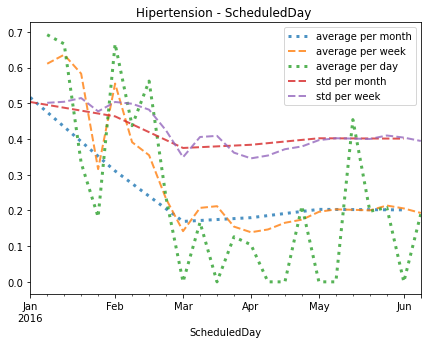

In [79]:
plt.figure(figsize=(7, 5))
ts.loc['2016', 'Hipertension'].resample('M').mean().plot(label='average per month', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Hipertension'].resample('W').mean().plot(label='average per week', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Hipertension'].resample('D').mean().plot(label='average per day', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Hipertension'].resample('M').std().plot(label='std per month', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Hipertension'].resample('W').std().plot(label='std per week', lw=2, ls='--', alpha=0.8)
plt.title("Hipertension - ScheduledDay ")
plt.legend()
plt.show()

In [80]:
ts.loc['2016', 'Hipertension'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-31 00:00:00+00:00,0.516667,0.503939,0,1
2016-02-29 00:00:00+00:00,0.310714,0.463615,0,1
2016-03-31 00:00:00+00:00,0.169321,0.375088,0,1
2016-04-30 00:00:00+00:00,0.179817,0.384042,0,1
2016-05-31 00:00:00+00:00,0.203059,0.402279,0,1
2016-06-30 00:00:00+00:00,0.201648,0.401245,0,1


In [81]:
ts.loc['2016', 'Hipertension'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-10 00:00:00+00:00,0.611111,0.501631,0,1
2016-01-17 00:00:00+00:00,0.636364,0.504525,0,1
2016-01-24 00:00:00+00:00,0.583333,0.514929,0,1
2016-01-31 00:00:00+00:00,0.315789,0.477567,0,1
2016-02-07 00:00:00+00:00,0.555556,0.503953,0,1
2016-02-14 00:00:00+00:00,0.391304,0.499011,0,1
2016-02-21 00:00:00+00:00,0.354839,0.482370,0,1
2016-02-28 00:00:00+00:00,0.232558,0.424110,0,1
2016-03-06 00:00:00+00:00,0.142058,0.349305,0,1


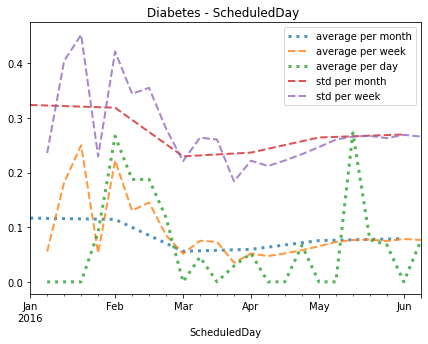

In [82]:
plt.figure(figsize=(7, 5))
ts.loc['2016', 'Diabetes'].resample('M').mean().plot(label='average per month', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Diabetes'].resample('W').mean().plot(label='average per week', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Diabetes'].resample('D').mean().plot(label='average per day', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Diabetes'].resample('M').std().plot(label='std per month', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Diabetes'].resample('W').std().plot(label='std per week', lw=2, ls='--', alpha=0.8)
plt.title("Diabetes - ScheduledDay ")
plt.legend()
plt.show()

In [83]:
ts.loc['2016', 'Diabetes'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-31 00:00:00+00:00,0.116667,0.323732,0,1
2016-02-29 00:00:00+00:00,0.114286,0.318728,0,1
2016-03-31 00:00:00+00:00,0.055882,0.229725,0,1
2016-04-30 00:00:00+00:00,0.059514,0.236590,0,1
2016-05-31 00:00:00+00:00,0.075529,0.264244,0,1
2016-06-30 00:00:00+00:00,0.079026,0.269789,0,1


In [84]:
ts.loc['2016', 'Diabetes'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-10 00:00:00+00:00,0.055556,0.235702,0,1
2016-01-17 00:00:00+00:00,0.181818,0.404520,0,1
2016-01-24 00:00:00+00:00,0.250000,0.452267,0,1
2016-01-31 00:00:00+00:00,0.052632,0.229416,0,1
2016-02-07 00:00:00+00:00,0.222222,0.421637,0,1
2016-02-14 00:00:00+00:00,0.130435,0.344350,0,1
2016-02-21 00:00:00+00:00,0.145161,0.355139,0,1
2016-02-28 00:00:00+00:00,0.085271,0.280374,0,1
2016-03-06 00:00:00+00:00,0.051454,0.221046,0,1


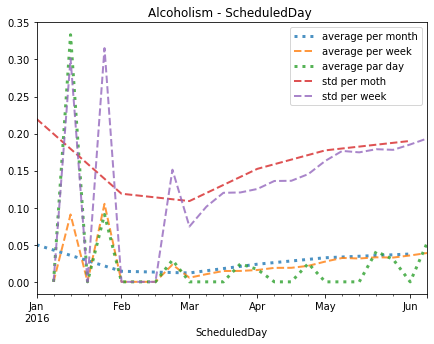

In [85]:
plt.figure(figsize=(7, 5))
ts.loc['2016', 'Alcoholism'].resample('M').mean().plot(label='average per month', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Alcoholism'].resample('W').mean().plot(label='average per week', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Alcoholism'].resample('D').mean().plot(label='average par day', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Alcoholism'].resample('M').std().plot(label='std per moth', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Alcoholism'].resample('W').std().plot(label='std per week', lw=2, ls='--', alpha=0.8)
plt.title("Alcoholism - ScheduledDay ")
plt.legend()
plt.show()

In [86]:
ts.loc['2016', 'Alcoholism'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-31 00:00:00+00:00,0.050000,0.219784,0,1
2016-02-29 00:00:00+00:00,0.014286,0.118879,0,1
2016-03-31 00:00:00+00:00,0.012015,0.108966,0,1
2016-04-30 00:00:00+00:00,0.023806,0.152447,0,1
2016-05-31 00:00:00+00:00,0.032516,0.177368,0,1
2016-06-30 00:00:00+00:00,0.037545,0.190099,0,1


In [87]:
ts.loc['2016', 'Alcoholism'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-10 00:00:00+00:00,0.000000,0.000000,0,0
2016-01-17 00:00:00+00:00,0.090909,0.301511,0,1
2016-01-24 00:00:00+00:00,0.000000,0.000000,0,0
2016-01-31 00:00:00+00:00,0.105263,0.315302,0,1
2016-02-07 00:00:00+00:00,0.000000,0.000000,0,0
2016-02-14 00:00:00+00:00,0.000000,0.000000,0,0
2016-02-21 00:00:00+00:00,0.000000,0.000000,0,0
2016-02-28 00:00:00+00:00,0.023256,0.151302,0,1
2016-03-06 00:00:00+00:00,0.005593,0.074618,0,1


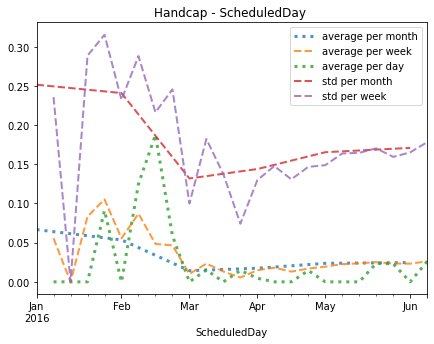

In [88]:
plt.figure(figsize=(7, 5))
ts.loc['2016', 'Handcap'].resample('M').mean().plot(label='average per month', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Handcap'].resample('W').mean().plot(label='average per week', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Handcap'].resample('D').mean().plot(label='average per day', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'Handcap'].resample('M').std().plot(label='std per month', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'Handcap'].resample('W').std().plot(label='std per week', lw=2, ls='--', alpha=0.8)
plt.title("Handcap - ScheduledDay ")
plt.legend()
plt.show()

In [89]:
ts.loc['2016', 'Handcap'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-31 00:00:00+00:00,0.066667,0.251549,0,1
2016-02-29 00:00:00+00:00,0.053571,0.240939,0,2
2016-03-31 00:00:00+00:00,0.014250,0.131926,0,2
2016-04-30 00:00:00+00:00,0.017357,0.143940,0,3
2016-05-31 00:00:00+00:00,0.023631,0.165428,0,4
2016-06-30 00:00:00+00:00,0.024568,0.170926,0,4


In [90]:
ts.loc['2016', 'Handcap'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-10 00:00:00+00:00,0.055556,0.235702,0,1
2016-01-17 00:00:00+00:00,0.000000,0.000000,0,0
2016-01-24 00:00:00+00:00,0.083333,0.288675,0,1
2016-01-31 00:00:00+00:00,0.105263,0.315302,0,1
2016-02-07 00:00:00+00:00,0.055556,0.232311,0,1
2016-02-14 00:00:00+00:00,0.086957,0.288104,0,1
2016-02-21 00:00:00+00:00,0.048387,0.216335,0,1
2016-02-28 00:00:00+00:00,0.046512,0.245601,0,2
2016-03-06 00:00:00+00:00,0.010067,0.099885,0,1


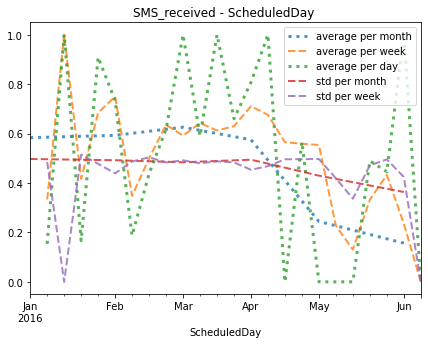

In [91]:
plt.figure(figsize=(7, 5))
ts.loc['2016', 'SMS_received'].resample('M').mean().plot(label='average per month', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'SMS_received'].resample('W').mean().plot(label='average per week', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'SMS_received'].resample('D').mean().plot(label='average per day', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'SMS_received'].resample('M').std().plot(label='std per month', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'SMS_received'].resample('W').std().plot(label='std per week', lw=2, ls='--', alpha=0.8)
plt.title("SMS_received - ScheduledDay ")
plt.legend()
plt.show()

In [92]:
ts.loc['2016', 'SMS_received'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-31 00:00:00+00:00,0.583333,0.497167,0,1
2016-02-29 00:00:00+00:00,0.592857,0.492182,0,1
2016-03-31 00:00:00+00:00,0.625873,0.483964,0,1
2016-04-30 00:00:00+00:00,0.575000,0.494353,0,1
2016-05-31 00:00:00+00:00,0.244566,0.429833,0,1
2016-06-30 00:00:00+00:00,0.156740,0.363569,0,1


In [93]:
ts.loc['2016', 'SMS_received'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-10 00:00:00+00:00,0.333333,0.485071,0,1
2016-01-17 00:00:00+00:00,1.000000,0.000000,1,1
2016-01-24 00:00:00+00:00,0.416667,0.514929,0,1
2016-01-31 00:00:00+00:00,0.684211,0.477567,0,1
2016-02-07 00:00:00+00:00,0.750000,0.439155,0,1
2016-02-14 00:00:00+00:00,0.347826,0.486985,0,1
2016-02-21 00:00:00+00:00,0.500000,0.504082,0,1
2016-02-28 00:00:00+00:00,0.635659,0.483121,0,1
2016-03-06 00:00:00+00:00,0.591723,0.491790,0,1


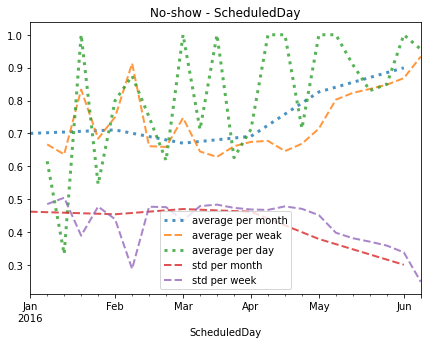

In [94]:
plt.figure(figsize=(7, 5))
ts.loc['2016', 'No-show'].resample('M').mean().plot(label='average per month', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'No-show'].resample('W').mean().plot(label='average per weak', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'No-show'].resample('D').mean().plot(label='average per day', lw=3, ls=':', alpha=0.8)
ts.loc['2016', 'No-show'].resample('M').std().plot(label='std per month', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'No-show'].resample('W').std().plot(label='std per week', lw=2, ls='--', alpha=0.8)
ts.loc['2016', 'No-show'].rolling(window=7)
plt.title("No-show - ScheduledDay")
plt.legend()
plt.show()

In [95]:
ts.loc['2016', 'No-show'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-31 00:00:00+00:00,0.700000,0.462125,0,1
2016-02-29 00:00:00+00:00,0.710714,0.454243,0,1
2016-03-31 00:00:00+00:00,0.670299,0.470170,0,1
2016-04-30 00:00:00+00:00,0.691242,0.461990,0,1
2016-05-31 00:00:00+00:00,0.826088,0.379037,0,1
2016-06-30 00:00:00+00:00,0.899468,0.300719,0,1


In [96]:
ts.loc['2016', 'No-show'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
ScheduledDay,,,,
2016-01-10 00:00:00+00:00,0.666667,0.485071,0,1
2016-01-17 00:00:00+00:00,0.636364,0.504525,0,1
2016-01-24 00:00:00+00:00,0.833333,0.389249,0,1
2016-01-31 00:00:00+00:00,0.684211,0.477567,0,1
2016-02-07 00:00:00+00:00,0.750000,0.439155,0,1
2016-02-14 00:00:00+00:00,0.913043,0.288104,0,1
2016-02-21 00:00:00+00:00,0.661290,0.477134,0,1
2016-02-28 00:00:00+00:00,0.658915,0.475922,0,1
2016-03-06 00:00:00+00:00,0.747204,0.434858,0,1


In [97]:
t = ts.rename(columns={"No-show": "No_show"})
t.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
ScheduledDay,,,,,,,,,,,
2016-04-29 18:38:08+00:00,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
2016-04-29 16:08:27+00:00,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2016-04-29 16:19:04+00:00,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
2016-04-29 17:29:31+00:00,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
2016-04-29 16:07:23+00:00,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [98]:
t[["Scholarship", "No_show"]].query("Scholarship == 0 and No_show == 0").value_counts()

Scholarship  No_show
0            0          19542
dtype: int64

In [99]:
t[["Scholarship", "No_show"]].query("Scholarship == 0 and No_show == 1").value_counts()

Scholarship  No_show
0            1          79549
dtype: int64

In [100]:
t[["Scholarship", "No_show"]].query("Scholarship == 0 and No_show == 0").value_counts()

Scholarship  No_show
0            0          19542
dtype: int64

In [101]:
t[["Scholarship", "No_show"]].query("Scholarship == 1 and No_show == 0").value_counts()

Scholarship  No_show
1            0          2556
dtype: int64

In [102]:
t[["Scholarship", "No_show"]].query("Scholarship == 1 and No_show == 1").value_counts().to_frame("Total")

,,Total
Scholarship,No_show,
1,1,8245


In [103]:
t[["No_show", "Gender"]].query("No_show == 0 and Gender == 'F'").value_counts()

No_show  Gender
0        F         14455
dtype: int64

In [104]:
t[["No_show", "Gender"]].query("No_show == 1 and Gender == 'F'").value_counts()

No_show  Gender
1        F         56962
dtype: int64

In [105]:
t[["No_show", "Gender"]].query("No_show == 0 and Gender == 'M'").value_counts()

No_show  Gender
0        M         7643
dtype: int64

In [106]:
t[["No_show", "Gender"]].query("No_show == 1 and Gender == 'M'").value_counts()

No_show  Gender
1        M         30832
dtype: int64

## Conclusion

####  1) After analyzing the dataset:: 
#####  - 8,245 patients benefiting from the Bolsa Família program responded to the appointment;
#####  - 2556 patients benefiting from the Bolsa Família program did not attend the appointment. On the other hand, 79,549 patients not benefiting from the Bolsa Família program responded to the appointment.
##### 2)
##### - We note that many patients responded to the appointment, which gives a higher than average participation rate with 79.89%.
##### - The number of women who showed their show up is higher than that of men. On the other hand, the number of men who did not show their show up is lower than that of women.
##### 3) We note between the months of January and February the average rate of No-show is almost constant. Thereafter, between February and March there was a low average No_show rate and finally between April and June there was a considerable peak. We can conclude that this peak could be maintained in the coming months.